In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Fonction pour abréger les noms des paramètres
def abbreviate_param(param):
    # Extraire le numéro du paramètre (2, 3, etc.)
    parts = param.split('_')
    return f"PARAM_{parts[2]}"  # On prend la 3ème partie qui contient le chiffre


# Fonction pour vérifier si une annotation est trop proche d'une autre
def is_too_close(current_y, annotated_points, threshold=0.05):
    return any(abs(current_y - y) < threshold for y in annotated_points)



# Fonction pour tracer le graphique d'une primitive donnée
def plot_primitive(df,primitive_name, threshold=0.05):
    """
    Tracer le graphique d'une primitive donnée
    Args:
        df (pd.DataFrame): Le dataframe contenant les données
        primitive_name (str): Le nom de la primitive à tracer
        threshold (float): Le seuil de distance entre les annotations (par défaut 0.05)
    """
    subset = df[df['Primitive'] == primitive_name]
    
    if subset.empty:
        print(f"No data found for primitive: {primitive_name}")
        return
    
    # Tracer chaque variante dans un même graphique
    variants = subset['Variants'].unique()
    
    plt.figure()
    annotated_points = []  # Pour garder une trace des positions annotées

    for variant in variants:
        sub_variant = subset[subset['Variants'] == variant]
        plt.plot(sub_variant['Short_Parameters'], sub_variant['Time (ms)'], label=variant, marker='o')
        
        # Ajouter les annotations des valeurs des temps sur les points avec vérification
        for i, row in sub_variant.iterrows():
            current_y = row['Time (ms)']
            if not is_too_close(current_y, annotated_points, threshold=threshold):  # Ajuster le seuil si nécessaire
                plt.text(row['Short_Parameters'], current_y, f"{current_y:.2f}", 
                         fontsize=9, ha='right', va='bottom')
                annotated_points.append(current_y)  # Ajouter l'annotation à la liste des positions annotées
        
    plt.xticks(rotation=45)
    plt.title(f'Temps d\'exécution pour {primitive_name}')
    plt.xlabel('Paramètres')
    plt.ylabel('Temps (ms)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def read_csv(file_path):
    df = pd.read_csv(file_path)
    df['Short_Parameters'] = df['Parameters'].apply(abbreviate_param)
    return df




In [5]:
# Charger les données depuis le fichier CSV
df_all = read_csv("../exports/benchmark_results.csv")
df_lwe_to_glwe = read_csv("../exports/packing_lwe_to_glwe.csv")
df_one_lwe_to_glwe = read_csv("../exports/packing_one_lwe_to_glwe.csv")

In [6]:
# print les primitives disponibles
print(df_all['Primitive'].unique())



['blind_rotate' 'packing_lwe_to_glwe' 'packing_one_lwe_to_glwe'
 'extract_lwe_sample_from_glwe_ciphertext' 'keyswitch_lwe_ciphertext']


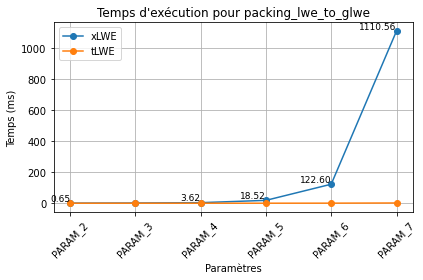

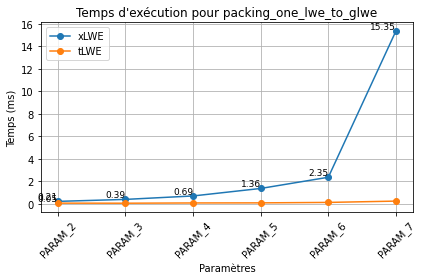

In [8]:
# Exemple d'utilisation
plot_primitive(df_lwe_to_glwe, "packing_lwe_to_glwe", threshold=1)
plot_primitive(df_one_lwe_to_glwe, "packing_one_lwe_to_glwe", threshold=0.1)
